In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, transpile, execute
from qiskit.compiler import assemble

import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram

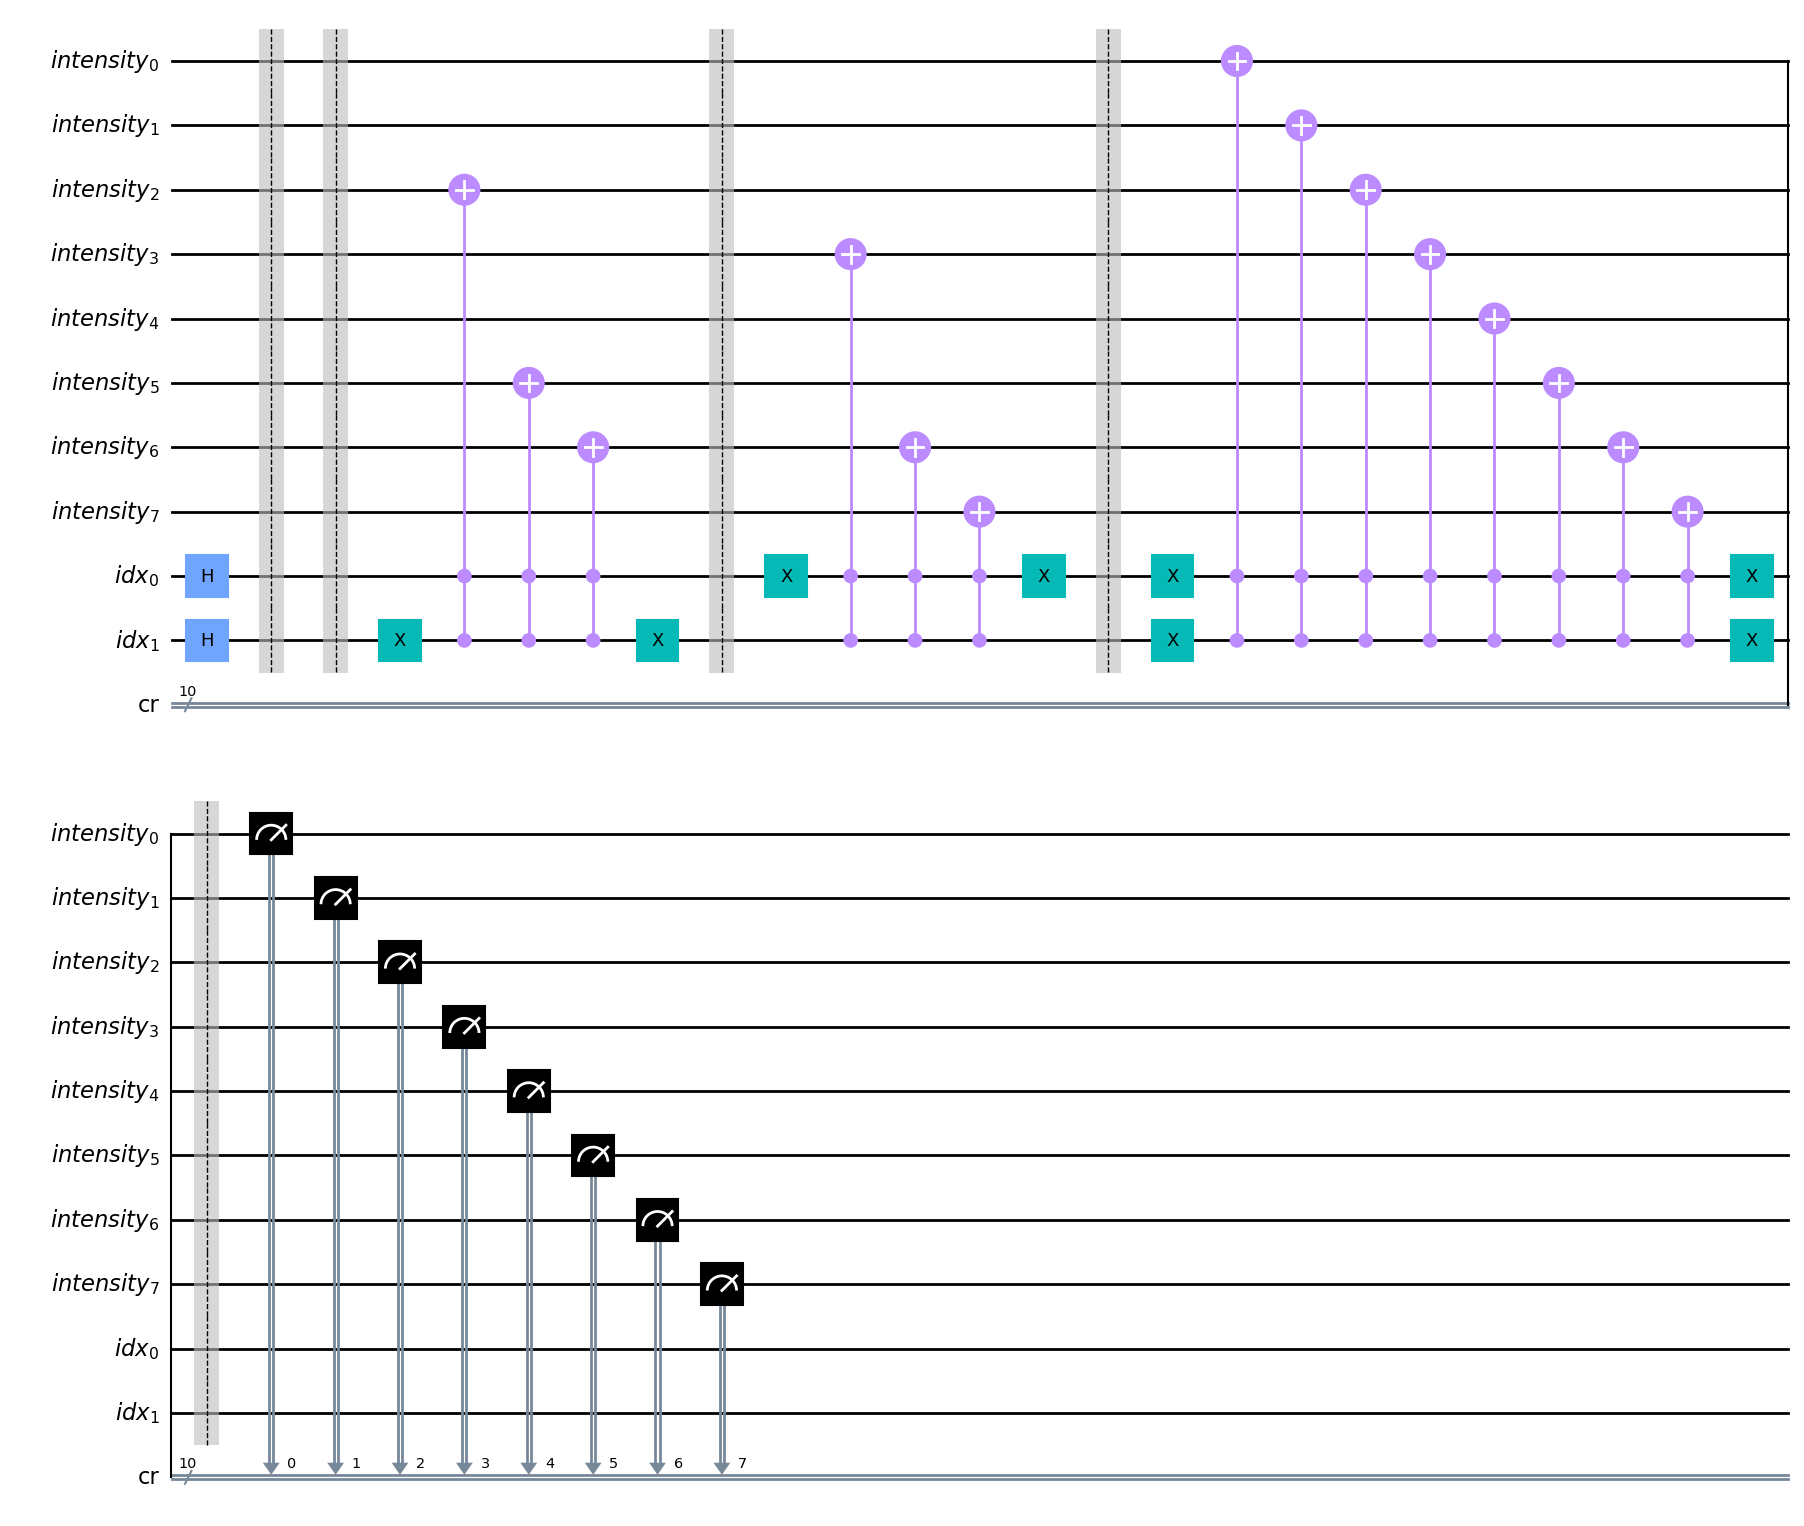

In [2]:
idx = QuantumRegister(2, 'idx')
intensity = QuantumRegister(8, 'intensity')
cr = ClassicalRegister(10, 'cr')
qc_image = QuantumCircuit(intensity,idx,cr)

#hadamard initialization    
qc_image.h(8)
qc_image.h(9)

qc_image.barrier()

#pixels
values = ['00000000','01100100','11001000','11111111']

for id1 in range(len(values)):
    if(id1%2 != 0):
        qc_image.x(qc_image.num_qubits - 1 - 0)
    if(int(id1/2)%2 != 0):
        qc_image.x(qc_image.num_qubits - 1 - 1)
        
    for id2, px_value in enumerate(values[id1][::-1]):
        if(px_value=='1'):
            qc_image.ccx(qc_image.num_qubits-1, qc_image.num_qubits-2, id2)
    
    
    if(id1%2 != 0):
        qc_image.x(qc_image.num_qubits - 1 - 0)
    if(int(id1/2)%2 != 0):
        qc_image.x(qc_image.num_qubits - 1 - 1)

    qc_image.barrier()

qc_image.measure(range(8),range(8))
qc_image.draw()

{'0011111111': 2075, '0011001000': 2015, '0001100100': 2068, '0000000000': 2034}


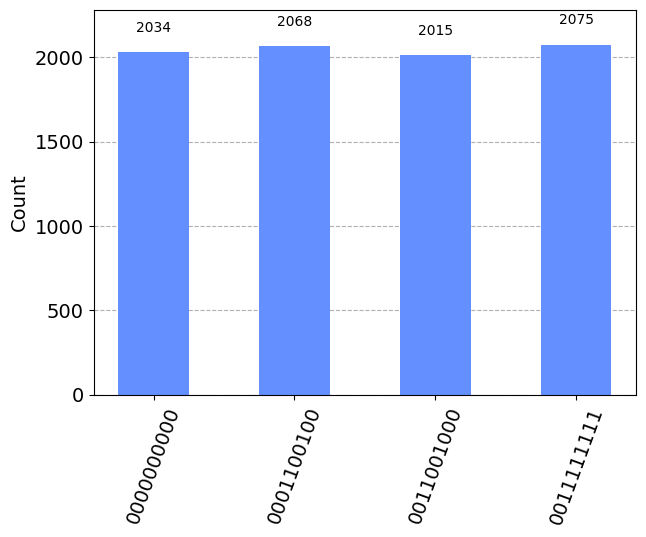

In [3]:
aer_sim = Aer.get_backend('aer_simulator')
job = execute(qc_image,aer_sim,shots=8192)
result_neqr = job.result()
counts_neqr = result_neqr.get_counts()
print(counts_neqr)
plot_histogram(counts_neqr)